In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats

# Database connection details
DB_NAME = "student_mental_health"
DB_USER = "postgres"
DB_PASSWORD = "postgres"
DB_HOST = "localhost"
DB_PORT = "5432"

# Create database engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

# Query to load data from the table
query = "SELECT * FROM student_mental_health"

# Load data into pandas DataFrame
df = pd.read_sql(query, engine)

In [2]:
print(df.head())

print(df.describe())

print(df.isnull().sum())

df = df.dropna(how='any', axis=0)

print(df.isnull().sum())

        Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No                  Yes  

In [3]:
df.rename(columns={'Choose your gender': 'gender'}, inplace=True)
df['Your current year of Study'] = df['Your current year of Study'].str.lower().str.capitalize()
years_of_study = df['Your current year of Study'].unique()
genders = df['gender'].unique()

In [4]:
df['CGPA_gender'] = df['What is your CGPA?'].apply(
    lambda x: (float(x.split('-')[0].strip()) + float(x.split('-')[1].strip())) / 2)

# Change the type of the column to float
df['CGPA_gender'] = df['CGPA_gender'].astype(float)

In [5]:
total_students = len(df)
anxiety_count = len(df[df['Do you have Anxiety?'] == 'Yes'])
depression_count = len(df[df['Do you have Depression?'] == 'Yes'])
both_count = len(df[(df['Do you have Anxiety?'] == 'Yes') & (df['Do you have Depression?'] == 'Yes')])

anxiety_count_percentage = (anxiety_count / total_students) * 100
depression_count_percentage = (depression_count / total_students) * 100
both_count_percentage = (both_count / total_students) * 100

In [6]:
avg_cgpa = []

for year in years_of_study:
    year_data = {'year': year}
    for gender in genders:
        gender_year_df = df[(df['Your current year of Study'] == year) & (df['gender'] == gender)]

        if gender_year_df.empty:
            print(f"No data for {gender} students in year {year}")
            continue

        avg_cgpa_value = gender_year_df['CGPA_gender'].mean()
        year_data[f'{gender.lower()}_avg'] = float("{:.2f}".format(avg_cgpa_value))
        print(f"Average CGPA for {gender} students: {avg_cgpa_value:.2f}")

    if 'female_avg' not in year_data:
        year_data['female_avg'] = None
    if 'male_avg' not in year_data:
        year_data['male_avg'] = None

    avg_cgpa.append(year_data)

avg_cgpa

Average CGPA for Female students: 3.49
Average CGPA for Male students: 3.16
Average CGPA for Female students: 3.41
Average CGPA for Male students: 3.29
Average CGPA for Female students: 3.20
Average CGPA for Male students: 3.62
Average CGPA for Female students: 3.61
Average CGPA for Male students: 3.25


[{'year': 'Year 1', 'female_avg': 3.49, 'male_avg': 3.16},
 {'year': 'Year 2', 'female_avg': 3.41, 'male_avg': 3.29},
 {'year': 'Year 3', 'female_avg': 3.2, 'male_avg': 3.62},
 {'year': 'Year 4', 'female_avg': 3.61, 'male_avg': 3.25}]

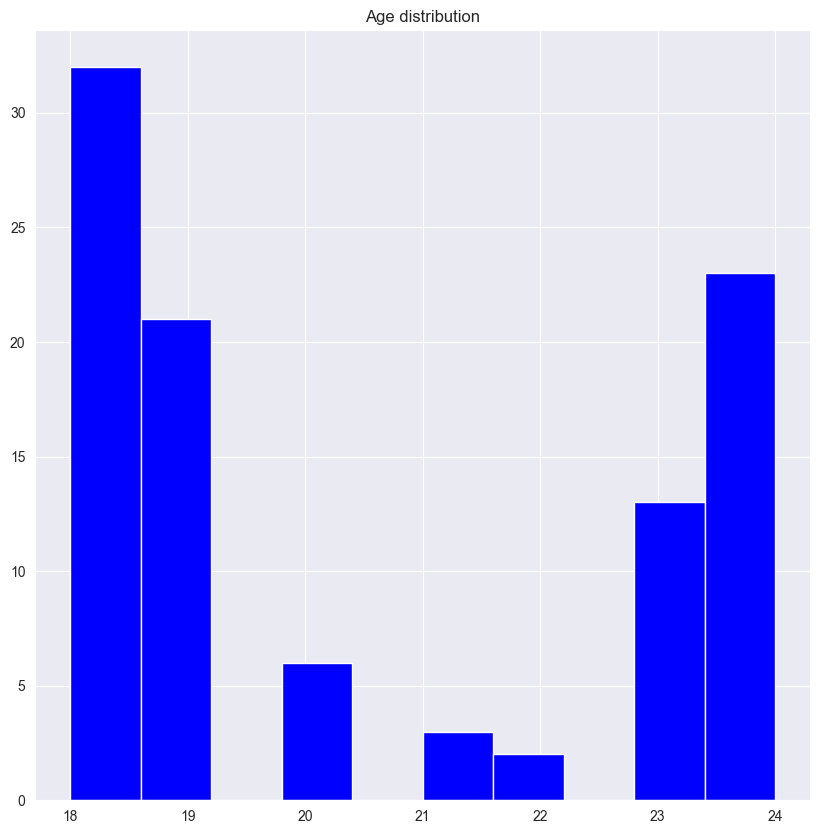

In [7]:
plt.figure(figsize=(10, 10))
plt.hist(df['Age'], color='b')
plt.title("Age distribution");

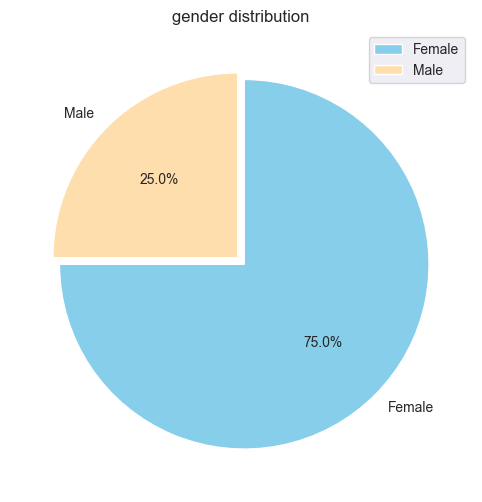

In [8]:
plt.figure(figsize=(12, 6))
plt.title("gender distribution")
g = plt.pie(df.gender.value_counts(), explode=(0.025, 0.025), labels=df.gender.value_counts().index,
            colors=['skyblue', 'navajowhite'], autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

In [9]:
df['gender']

0      Female
1        Male
2        Male
3      Female
4        Male
        ...  
96     Female
97       Male
98     Female
99     Female
100      Male
Name: gender, Length: 100, dtype: object

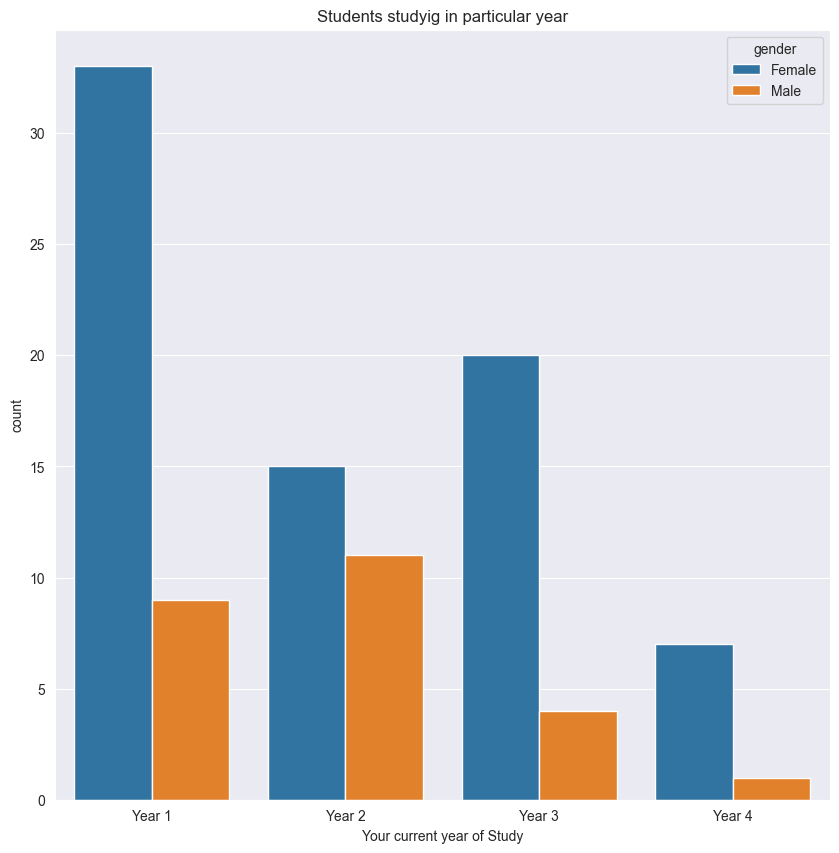

In [10]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Your current year of Study', hue='gender')
plt.title("Students studyig in particular year");

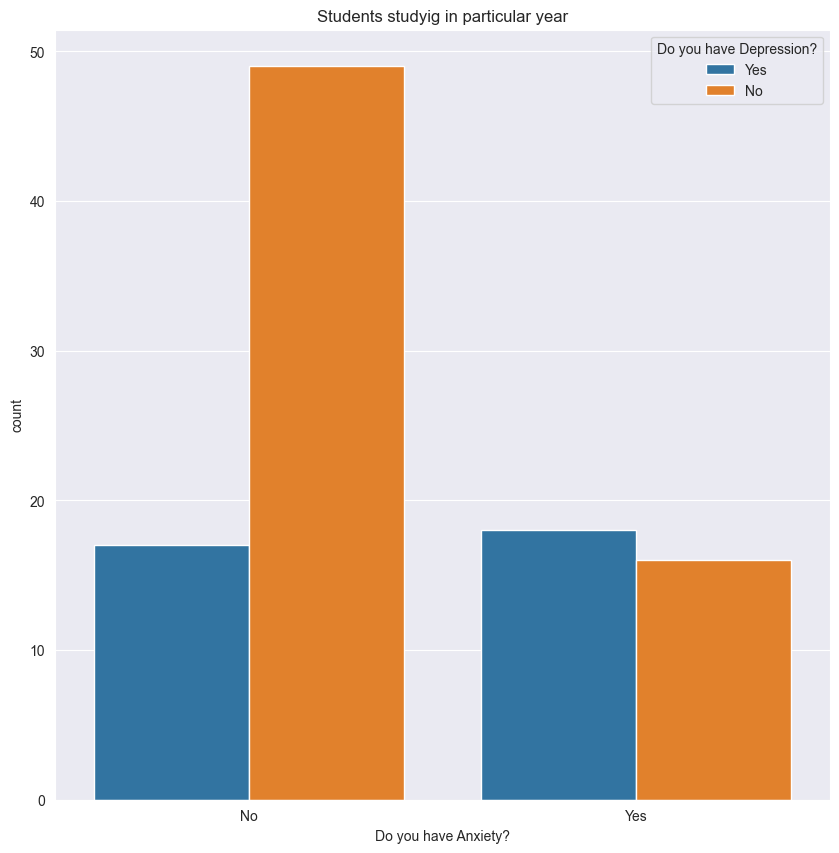

In [11]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x='Do you have Anxiety?', hue='Do you have Depression?')
plt.title("Students studyig in particular year");
plt.show()

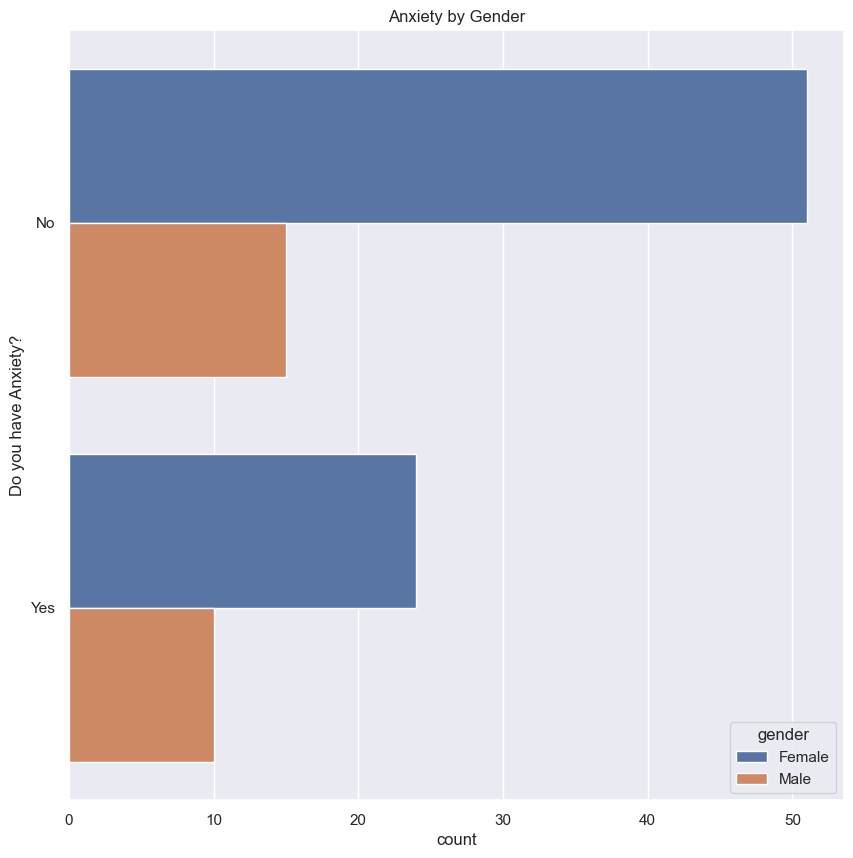

In [12]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue="gender", data=df)
plt.title("Anxiety by Gender")
plt.show()

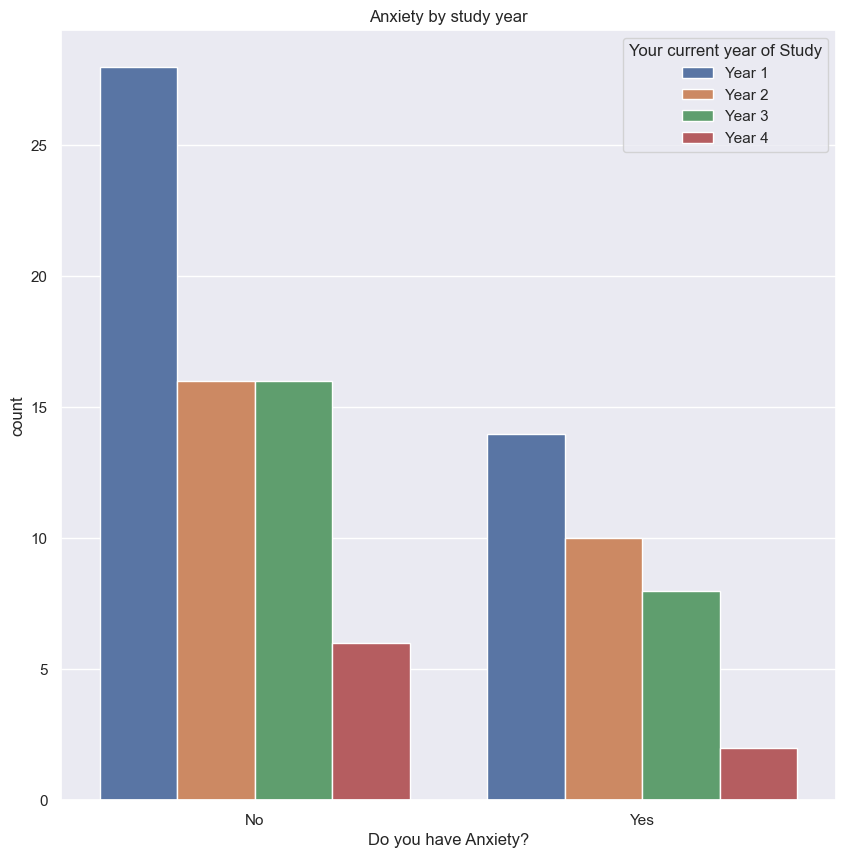

In [13]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Anxiety?", hue="Your current year of Study", data=df)
plt.title("Anxiety by study year")
plt.show()


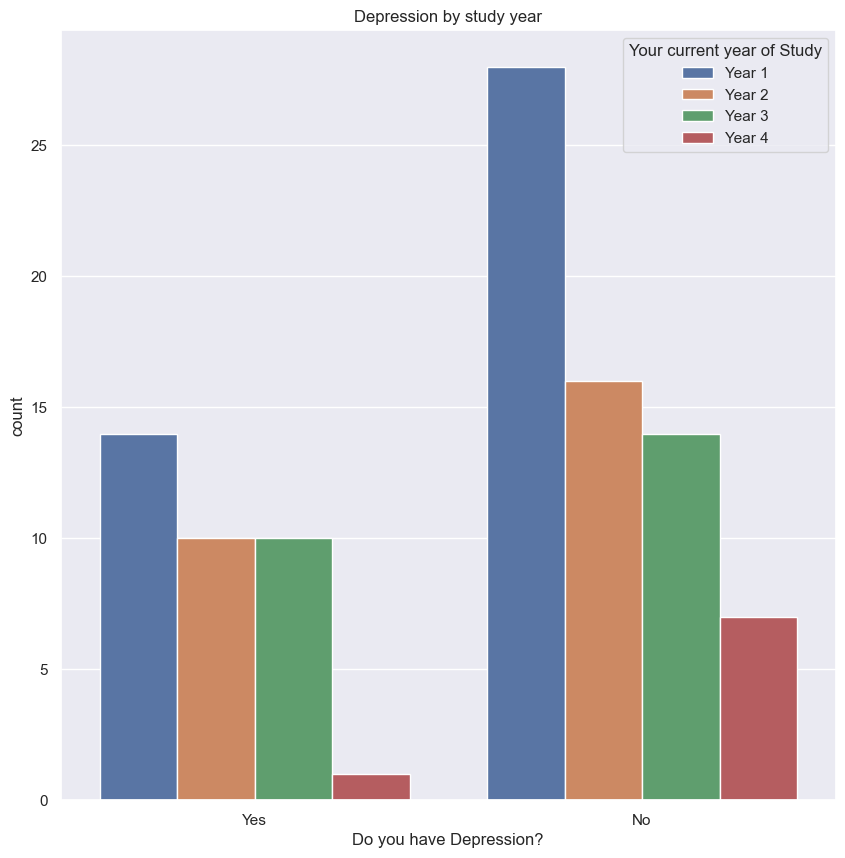

In [14]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Depression?", hue="Your current year of Study", data=df)
plt.title("Depression by study year")
plt.show()

##### Usage of Lists

In [15]:
filtered_df = df[(df['What is your course?'] == 'Engineering') & (df['Do you have Anxiety?'] == 'Yes') & (
        df['Do you have Depression?'] == 'Yes')]
filtered_entries = filtered_df.values.tolist()
filtered_entries

[['8/7/2020 13:41',
  'Male',
  18.0,
  'Engineering',
  'Year 2',
  '3.00 - 3.49',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'No',
  3.245],
 ['13/07/2020 10:12:26',
  'Female',
  19.0,
  'Engineering',
  'Year 1',
  '3.00 - 3.49',
  'No',
  'Yes',
  'Yes',
  'No',
  'No',
  3.245],
 ['13/07/2020 21:21:42',
  'Male',
  18.0,
  'Engineering',
  'Year 2',
  '3.00 - 3.49',
  'No',
  'Yes',
  'Yes',
  'No',
  'No',
  3.245]]

### P-Value Analysis
###### We wanted to calculate a p-value between two columns but we only had the age column that is numeric.
###### In order to create a second column that is numeric we took the 'What is your CGPA' Column and through a lambda function we calculated the mean value of the two string values
###### After that we changed the 'What is your CGPA' to a float 
###### In the correlations analysis we compare the age and the cgpa of a student. The result is a very high p-value which indicates between this two variables there is no statistical significant correlation

In [16]:
# Calculate the mean value between the two values in the 'What is your CGPA?' column
df['What is your CGPA?'] = df['What is your CGPA?'].apply(
    lambda x: (float(x.split('-')[0].strip()) + float(x.split('-')[1].strip())) / 2)

# Change the type of the column to float
df['What is your CGPA?'] = df['What is your CGPA?'].astype(float)

# Calculate the correlation and p-value
correlation, p_value = pearsonr(df['Age'], df['What is your CGPA?'])

# Print the correlation and p-value
print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.005610087615604074
P-value: 0.9558230007333758


In [17]:
# Statistical analysis: Chi-square test for independence between Anxiety and Depression
contingency_table = pd.crosstab(df['Do you have Anxiety?'], df['Do you have Depression?'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test results:\nChi2: {chi2}\nP-value: {p}\nDegrees of freedom: {dof}")

Chi-square test results:
Chi2: 6.142876731112027
P-value: 0.013194249179498827
Degrees of freedom: 1
